In [ ]:
#importing necessary libraries 
import pandas as pd
import nltk
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from gensim.parsing.preprocessing import STOPWORDS
import numpy as np
import pickle
nltk.download('stopwords')
nltk.download('wordnet')
from typing import List, Dict, Tuple, Set
import itertools
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pickle
import requests
import json
import urllib.request
import time
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
import re
from sklearn.metrics.pairwise import cosine_similarity
import statistics
from datetime import datetime
from scipy.stats import skew
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading dataset

In [ ]:
#importing the CSV file of the dataset from google drive into a dataframe
train_eclipse_df=pd.read_csv('drive/MyDrive/Project 6308 + ICSME/Siamese/Eclipse_siamese_train_preprocessed.csv')
train_eclipse_df


,Unnamed: 0,description1,description2,is_similar
0,0,investigate changes required for jep maco...,older api has limitations that require ugl...,0
1,2,oshi allows to access hard disk info let s ...,created attachment screenshot set maco...,0
2,3,details of this problem have been discussed ...,originally from method signature selectio...,1
3,4,created attachment example hello can you...,partontopmanager uses eventtopic instead of...,0
4,5,rename module path container from module so...,created attachment workspace log i have a...,0
...,...,...,...,...
34490,36402,if a miner fails for some reason now it is ...,i install oprofile plugin of eclipse on linu...,0
34491,36403,created attachment unsolved imports upgr...,expected result record r implements i but ...,0
34492,36404,in the coming days weeks we will migrate the...,consider the following code public sealed c...,0
34493,36405,the view model editor should provide proper ...,terminate all does only terminate one proc...,0


In [ ]:
#importing the CSV file of the dataset from google drive into a dataframe
test_eclipse_df=pd.read_csv('drive/MyDrive/Project 6308 + ICSME/Siamese/Eclipse_siamese_test_preprocessed.csv')
test_eclipse_df

,Unnamed: 0,description1,description2,is_similar
0,0,the new meta model is adapted for new coming...,created attachment azure vm agents config ...,0
1,1,as of now when a language server starts the...,bug comment by robart is spam please de...,0
2,2,i found an important bug regarding marketpla...,in stylemanager remove the restriction that...,0
3,3,the method generatorconfigurationoperations ...,seems like babel doesn t provide translation...,0
4,4,the current query test framework is incapabl...,in ticket the generic rule was changed to...,0
...,...,...,...,...
8843,9465,created attachment screenshot bug imple...,the git statistics property page should not ...,0
8844,9466,using eclipse build id the com...,a tree column created with swt center styl...,0
8845,9467,see for example tycho build console ...,when deploying an application and changing i...,0
8846,9468,add support to change background foregroun...,most packages are named eclipse ide for ...,0


In [ ]:
#Merge train & test
frames = [train_eclipse_df, test_eclipse_df]
result = pd.concat(frames)
result = result.sample(frac=1, random_state=1).reset_index(drop=True)
result1 = result.copy()
dup_df= result.copy()
dup_df

,Unnamed: 0,description1,description2,is_similar
0,1954,in bug we discovered that pde does not sup...,in current version this causes orbit reci...,0
1,34311,i need a mentor please eclipse swtchar...,hello checking out the basyx repository vi...,0
2,13017,some advices require additional inputs e g ...,created attachment ada source code and exe...,0
3,10131,created attachment workspace log file ste...,steps to reproduce run the sample applicat...,0
4,27543,textdocument definition request is expecte...,denis we should upgrade to the new version ...,0
...,...,...,...,...
43338,8241,after bug it seems unnecessary to listen t...,the jsonforms export should support the expo...,0
43339,34307,the data provider documentation is incomplet...,hello webmaster please delete branch jona...,0
43340,5478,it is not uncommon to use multiple levels of...,the label restore from local history is...,0
43341,12835,the registered downloads are filtered by pla...,use case user wants to download an eclipse ...,0


In [ ]:
FEATURES = ['description1', 'description2']
print('Description of length of the feature columns')
dup_df[FEATURES].apply(lambda col: col.str.len().describe())

Description of length of the feature columns


,description1,description2
count,43343.000000,43343.000000
mean,859.045498,914.414969
std,2150.363951,2395.067752
min,50.000000,50.000000
25%,185.000000,188.000000
50%,359.000000,371.000000
75%,740.000000,782.000000
max,94030.000000,94030.000000


## Train, Validation, Test Split

In [ ]:
from sklearn.model_selection import train_test_split
import random
import sklearn

In [ ]:
train_val_df = train_eclipse_df.copy()
train_val_df

,Unnamed: 0,description1,description2,is_similar
0,0,investigate changes required for jep maco...,older api has limitations that require ugl...,0
1,2,oshi allows to access hard disk info let s ...,created attachment screenshot set maco...,0
2,3,details of this problem have been discussed ...,originally from method signature selectio...,1
3,4,created attachment example hello can you...,partontopmanager uses eventtopic instead of...,0
4,5,rename module path container from module so...,created attachment workspace log i have a...,0
...,...,...,...,...
34490,36402,if a miner fails for some reason now it is ...,i install oprofile plugin of eclipse on linu...,0
34491,36403,created attachment unsolved imports upgr...,expected result record r implements i but ...,0
34492,36404,in the coming days weeks we will migrate the...,consider the following code public sealed c...,0
34493,36405,the view model editor should provide proper ...,terminate all does only terminate one proc...,0


In [ ]:
 test_df = test_eclipse_df.copy()
 test_df

,Unnamed: 0,description1,description2,is_similar
0,0,the new meta model is adapted for new coming...,created attachment azure vm agents config ...,0
1,1,as of now when a language server starts the...,bug comment by robart is spam please de...,0
2,2,i found an important bug regarding marketpla...,in stylemanager remove the restriction that...,0
3,3,the method generatorconfigurationoperations ...,seems like babel doesn t provide translation...,0
4,4,the current query test framework is incapabl...,in ticket the generic rule was changed to...,0
...,...,...,...,...
8843,9465,created attachment screenshot bug imple...,the git statistics property page should not ...,0
8844,9466,using eclipse build id the com...,a tree column created with swt center styl...,0
8845,9467,see for example tycho build console ...,when deploying an application and changing i...,0
8846,9468,add support to change background foregroun...,most packages are named eclipse ide for ...,0


In [ ]:
train_df, val_df = train_test_split(
  train_val_df,
  test_size=0.2,
  stratify=train_val_df.is_similar,
  random_state=13,
)

In [ ]:
train_df

,Unnamed: 0,description1,description2,is_similar
33970,35858,a number of times today i attempted to push ...,signing service is down as can be seen at ...,0
22051,23259,the download location for the three ecli...,when trying to open the target platfrom pref...,0
27042,28531,on windows korean locale the defaultwebbr...,for the following code see outline view ...,0
31184,32901,here is a convoluted issue when trying to bu...,we have various compiler warnings in e g ...,0
13394,14101,ei creation inside interface in idb cdb diag...,since yesterday the workspace has build pa...,0
...,...,...,...,...
20006,21103,this bug is for the following commit xy g...,hello team we would like to configure the ...,0
27573,29095,the message err too many redirects is alread...,some tests are failing due to diagram openin...,0
3635,3837,to track issues for the capella modes states...,currently openmdm uses to quote strings ...,0
17642,18612,fix a problem in run task phase chart gener...,the following features show up in the build ...,0


In [ ]:
len(val_df[val_df.is_similar.astype('bool')]) / len(val_df)

0.06899550659515871

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler 

In [ ]:
label= train_df.is_similar
type(label)

pandas.core.series.Series

In [ ]:
type(train_df)

pandas.core.frame.DataFrame

In [ ]:
sm = RandomOverSampler(random_state=42)
X_res, y_res = sm.fit_resample(X=train_df[['description1', 'description2']], y=train_df.is_similar)

In [ ]:
train_df = X_res.copy()
train_df['is_similar'] = y_res
train_df = train_df.sample(frac=1)

In [ ]:
train_df

,description1,description2,is_similar
8341,in the coming days we will migrate the triqu...,dual faced ports can discard messages of a c...,0
34149,the membership fee will change from being st...,let s use this bug to discuss changes to p...,1
30487,in my master workspace i had the type...,eclipse freeze when invoking type hierarchy ...,1
8801,as an application developer i would like to ...,when generating xhtml some html pages are n...,0
39014,eclipse java ee ide for web developers vers...,yesterday and today when i want to update my...,1
...,...,...,...
46903,just saw this error in the error log i m us...,as bug title says i ve closed workbench wit...,1
9175,tried to test hte build with codeedit widget...,created attachment log file i get the bel...,0
16460,new png icon which is used in platform tip...,please add ibm jdk into jenkins environmen...,0
32973,created attachment screenshot showing text...,this is a gtk issue being tracked at t...,1


In [ ]:
len(train_df[train_df.is_similar.astype('bool')]) / len(train_df)

0.5

In [ ]:
print(f'Train Val Test Size: {len(train_df):,} {len(val_df):,} {len(test_df):,}')

Train Val Test Size: 51,386 6,899 8,848


## Download & Prepare Embedding

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import tensorflow as tf
import tensorflow.keras.utils as kutils
from keras.layers.preprocessing.text_vectorization import TextVectorization

## create vocabulary index

In [ ]:
from typing import List

In [ ]:
MAX_TOKENS = 20000
MAX_TITLE_LENGTH = 21
MAX_DESCRIPTION_LENGTH = 1000
EMBEDDING_DIM = 100

In [ ]:
def build_vocab(sentences: List[str], sequence_length: int):
  vectorizer = TextVectorization(
    max_tokens=MAX_TOKENS - 2,
    output_sequence_length=sequence_length,
  )
  vectorizer.adapt(sentences)
  vocab = vectorizer.get_vocabulary()
  word_index = dict(zip(vocab, range(len(vocab))))

  return vectorizer, word_index

In [ ]:
descr_vectorizer, descr_word_index = build_vocab(
  [dup_df.description1, dup_df.description2],
  MAX_DESCRIPTION_LENGTH,
)

print(
  'Most frequent description words:',
  list(itertools.islice(descr_word_index.keys(), 5)),
)

Most frequent description words: ['', '[UNK]', 'eclipse', 'org', 'at']


In [ ]:
len(descr_word_index)

19998

## Prepare Training Data

In [ ]:
def generate_batches(
  split_df: pd.DataFrame,
  batch_size=1024,
):
  steps_per_epoch = len(split_df) // batch_size
  while True:
    for i in range(steps_per_epoch):
      offset = i * batch_size
      till = offset + batch_size
      feature_batches = []
      for feature in FEATURES:
        vectorizer = descr_vectorizer
        feature_batch = vectorizer(
          split_df[feature][offset: till].to_numpy().reshape((-1, 1))
        ).numpy()
        feature_batches.append(feature_batch)


      target_batch = split_df.is_similar[offset: till].to_numpy()
      yield (
        feature_batches,
        target_batch,
      )

## Create Models

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import callbacks
from keras.initializers.initializers_v2 import Constant

In [ ]:
DescrEmbeddingLayer = layers.Embedding(
  input_dim=MAX_TOKENS,
  output_dim=EMBEDDING_DIM,
  name='DescrEmbeddingLayer',
)

def make_descr_layer(num, kernel_size=3, pool_size=2, strides=None):
  DescrConv1dLayer = layers.Conv1D(
    filters=32,
    kernel_size=kernel_size,
    activation='relu',
    name=f'DescrConv1dLayer{num}',
  )
  DescrMaxPool1dLayer = layers.MaxPool1D(
    pool_size=pool_size,
    strides=strides,
    name=f'DescrMaxPool1dLayer{num}',
  )
  return DescrConv1dLayer, DescrMaxPool1dLayer

DescrConv1dLayer1, DescrMaxPool1dLayer1 = make_descr_layer(1, pool_size=4)
DescrConv1dLayer2, DescrMaxPool1dLayer2 = make_descr_layer(2)

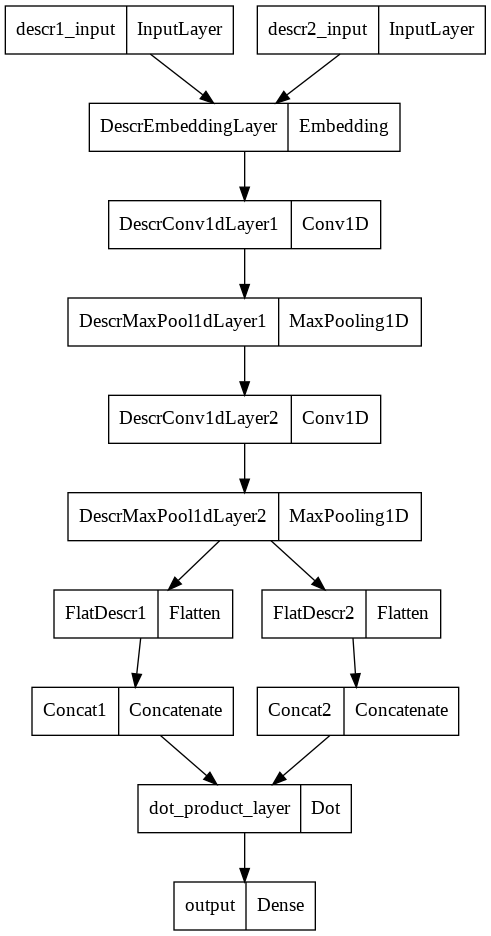

In [ ]:
def create_siamese_component(num: int):
  class SiameseComponent:
    def __init__(self, title: layers.Input, description: layers.Input, output: layers.Concatenate):
      self.title = title
      self.description = description
      self.output = output

  title_input = layers.Input(shape=(None,), dtype='int32', name=f'title{num}_input')

  descr_input = layers.Input(shape=(None,), name=f'descr{num}_input')
  descr_embedding_layer = DescrEmbeddingLayer(descr_input)
  descr_conv1d1 = DescrConv1dLayer1(descr_embedding_layer)
  descr_max_pool1d1 = DescrMaxPool1dLayer1(descr_conv1d1)
  descr_conv1d2 = DescrConv1dLayer2(descr_max_pool1d1)
  descr_max_pool1d2 = DescrMaxPool1dLayer2(descr_conv1d2)
  # descr_conv1d3 = DescrConv1dLayer3(descr_max_pool1d2)
  # descr_max_pool1d3 = DescrMaxPool1dLayer3(descr_conv1d3)
  descr_flat_Layer = layers.Flatten(name=f'FlatDescr{num}')(descr_max_pool1d2)
  
  concat = layers.Concatenate(axis=1, name=f'Concat{num}')([descr_flat_Layer])
  return SiameseComponent(title_input, descr_input, concat)


component1 = create_siamese_component(1)
component2 = create_siamese_component(2)

dot_product_layer = layers.Dot(
  axes=1,
  name='dot_product_layer'
)([component1.output, component2.output])
output = layers.Dense(
  1, activation='sigmoid', name='output',
)(dot_product_layer)
siamese_model = models.Model(
  inputs=[component1.description, component2.description],
  outputs=output,
  name='siamese_model'
)

kutils.plot_model(siamese_model)

## Train

In [ ]:
BATCH_SIZE = 2048

siamese_model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['acc'],
)
callback = callbacks.ModelCheckpoint(
    filepath=f'../../drive/MyDrive/Project 6308 + ICSME/Siamese'
             '.epoch-{epoch:02d}-loss-{val_loss:.3f}.hdf5',
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    mode='min',
)

In [ ]:
history = siamese_model.fit(
  generate_batches(train_df, BATCH_SIZE),
  steps_per_epoch=len(train_df) // BATCH_SIZE,
  epochs=30,
  validation_data=generate_batches(val_df, BATCH_SIZE),
  validation_steps=len(val_df) // BATCH_SIZE,
  verbose=1,
  # callbacks= [callback]
)

Epoch 1/30
25/25 [==============================] - 312s 12s/step - loss: 0.7212 - acc: 0.5095 - val_loss: 0.6412 - val_acc: 0.9168
Epoch 2/30
25/25 [==============================] - 311s 12s/step - loss: 0.6893 - acc: 0.5269 - val_loss: 0.6292 - val_acc: 0.9183
Epoch 3/30
25/25 [==============================] - 304s 12s/step - loss: 0.6874 - acc: 0.5307 - val_loss: 0.6215 - val_acc: 0.9225
Epoch 4/30
25/25 [==============================] - 313s 13s/step - loss: 0.6826 - acc: 0.5332 - val_loss: 0.6020 - val_acc: 0.9253
Epoch 5/30
25/25 [==============================] - 308s 12s/step - loss: 0.6662 - acc: 0.5305 - val_loss: 0.5576 - val_acc: 0.9303
Epoch 6/30
25/25 [==============================] - 310s 12s/step - loss: 0.5826 - acc: 0.6703 - val_loss: 0.4602 - val_acc: 0.8509
Epoch 7/30
25/25 [==============================] - 305s 12s/step - loss: 0.4530 - acc: 0.8374 - val_loss: 0.7207 - val_acc: 0.8711
Epoch 8/30
25/25 [==============================] - 313s 12s/step - loss: 0.

In [ ]:
siamese_model.save('something.hd5')

INFO:tensorflow:Assets written to: something.hd5/assets


In [ ]:
something.hd5

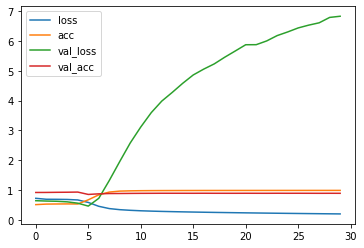

In [ ]:
ax = pd.DataFrame(history.history).plot()

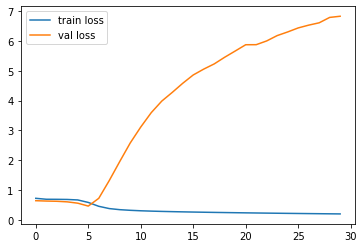

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.utils.vis_utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
plot_model(siamese_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

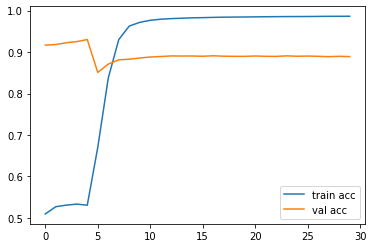

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
from sklearn.metrics import accuracy_score
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Evaluate on test data

In [ ]:
# from tensorflow.keras.models import load_model

# siamese_model = load_model('../../models/siamese-openOffice.epoch-30-loss-0.457.hdf5')

In [ ]:
siamese_model.evaluate(
  generate_batches(test_df, BATCH_SIZE),
  steps=len(test_df) // BATCH_SIZE,
)

4/4 [==============================] - 16s 4s/step - loss: 7.9758 - acc: 0.8566


[7.975811958312988, 0.8565673828125]

In [ ]:
len(test_df)

8848

In [ ]:
BATCH_SIZE = len(test_df)
num_batched_instances = len(test_df) - (len(test_df) % BATCH_SIZE)
pred_y = siamese_model.predict(
  generate_batches(test_df, BATCH_SIZE),
  steps=len(test_df) // BATCH_SIZE,
  verbose=1,
)

1/1 [==============================] - 23s 23s/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(
  test_df.is_similar[:num_batched_instances],
  pred_y > .5,
))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      8203
           1       0.13      0.18      0.15       645

    accuracy                           0.85      8848
   macro avg       0.53      0.54      0.54      8848
weighted avg       0.88      0.85      0.86      8848



In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [ ]:
from sklearn.metrics import roc_curve

value_names = ['TPR', 'FPR', 'Threshold']
roc = dict(zip(value_names, roc_curve(
  test_df.is_similar[:num_batched_instances],
  pred_y,
)))
pd.DataFrame(roc)

,TPR,FPR,Threshold
0,0.000000,0.000000,1.698285e+00
1,0.051810,0.120930,6.982854e-01
2,0.052786,0.120930,6.982644e-01
3,0.052786,0.124031,6.982504e-01
4,0.054248,0.124031,6.981809e-01
...,...,...,...
697,0.634646,0.694574,2.133123e-38
698,0.635865,0.694574,1.423115e-38
699,0.635865,0.696124,1.404519e-38
700,0.636109,0.696124,1.238208e-38


In [ ]:
from sklearn.metrics import roc_auc_score

auroc = roc_auc_score(
  test_df.is_similar[:num_batched_instances],
  pred_y,
)

print('AUROC score:', auroc)

AUROC score: 0.58162271885782


In [ ]:
print('For probability:')
print(f'Mean: {pred_y.mean()}, STD: {pred_y.std()}')
print('For categorical:')
print(f'Mean: {(pred_y > .5).mean()}, STD: {(pred_y > .5).std()}')

For probability:
Mean: 0.07710234820842743, STD: 0.20585699379444122
For categorical:
Mean: 0.097875226039783, STD: 0.29714586681871313


## Evaluate on textually similar data

In [ ]:
#importing the CSV file of the dataset from google drive into a dataframe
sim_df=pd.read_csv('drive/MyDrive/Project 6308 + ICSME/Siamese/Eclipse_siamese_textually_similar_test_duplicates_preprocessed.csv')
sim_df

,Unnamed: 0,description1,description2,is_similar
0,0,installing eclipse via eclipse inst ex...,error present while building maven project w...,0
1,1,when enabling parallel builds warnings are r...,when i try to run my build in parallel using...,1
2,2,if i start my eclipse on i get java lan...,codefragments internal platform java ...,1
3,3,hello i installed the eclipse modeling too...,hello i installed the eclipse modeling too...,1
4,4,open a requirejs module file select one o...,created attachment error screenshot conte...,0
...,...,...,...,...
678,681,configuration details product eclipse...,configuration details product eclipse...,1
679,682,most of the time when i use open type i...,created attachment oomph startup error wh...,0
680,683,eclipse is located under c program files ec...,the fix for bug added quoting around the c...,1
681,684,hello setting background for the items in t...,using swt if you set the background o...,1


In [ ]:
len(sim_df)

683

In [ ]:
BATCH_SIZE = len(sim_df)
num_batched_instances = len(sim_df) - (len(sim_df) % BATCH_SIZE)
pred_y_sim = siamese_model.predict(
  generate_batches(sim_df, BATCH_SIZE),
  steps=len(sim_df) // BATCH_SIZE,
  verbose=1,
)

1/1 [==============================] - 1s 1s/step


In [ ]:
siamese_model.evaluate(
  generate_batches(sim_df, BATCH_SIZE),
  steps=len(sim_df) // BATCH_SIZE,
)

1/1 [==============================] - 1s 946ms/step - loss: 58.1121 - acc: 0.5110


[58.112144470214844, 0.5109809637069702]

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(
  sim_df.is_similar[:num_batched_instances],
  pred_y_sim > .5,
))

              precision    recall  f1-score   support

           0       0.51      0.85      0.64       343
           1       0.53      0.17      0.26       340

    accuracy                           0.51       683
   macro avg       0.52      0.51      0.45       683
weighted avg       0.52      0.51      0.45       683



In [ ]:
from sklearn.metrics import roc_curve

value_names = ['TPR', 'FPR', 'Threshold']
roc = dict(zip(value_names, roc_curve(
  sim_df.is_similar[:num_batched_instances],
  pred_y_sim,
)))
pd.DataFrame(roc)

,TPR,FPR,Threshold
0,0.000000,0.000000,1.698285e+00
1,0.078717,0.120588,6.982854e-01
2,0.078717,0.126471,6.982504e-01
3,0.084548,0.126471,6.981442e-01
4,0.084548,0.138235,6.977777e-01
...,...,...,...
205,0.781341,0.682353,8.150937e-38
206,0.781341,0.688235,5.422988e-38
207,0.784257,0.688235,4.399785e-38
208,0.784257,0.694118,1.404519e-38


In [ ]:
from sklearn.metrics import roc_auc_score

auroc = roc_auc_score(
  sim_df.is_similar[:num_batched_instances],
  pred_y_sim,
)

print('AUROC score:', auroc)


AUROC score: 0.4801620648259304


In [ ]:
print('For probability:')
print(f'Mean: {pred_y_sim.mean()}, STD: {pred_y_sim.std()}')
print('For categorical:')
print(f'Mean: {(pred_y_sim > .5).mean()}, STD: {(pred_y_sim > .5).std()}')

For probability:
Mean: 0.1312287151813507, STD: 0.2547241151332855
For categorical:
Mean: 0.16105417276720352, STD: 0.3675809110950612


## Evaluate on textually dissimilar data

In [ ]:
#importing the CSV file of the dataset from google drive into a dataframe
dissim_df=pd.read_csv('drive/MyDrive/Project 6308 + ICSME/Siamese/Eclipse_siamese_textually_dissimilar_test_duplicates_preprocessed.csv')
dissim_df

,Unnamed: 0,description1,description2,is_similar
0,0,created attachment example projects to rep...,created attachment picture with tree tree...,0
1,1,following snippet gives a wrong positive in ...,the current null analysis in ecj does not re...,1
2,2,in microsoft visual studio there was a rem...,created attachment patch tested with vs ...,1
3,3,created attachment tool bar is grey i wan...,created attachment disabled menu all of t...,1
4,4,most of the cases when seeing the validatio...,the cocoa version of textlayout has these li...,0
...,...,...,...,...
618,680,the links to various projects on git eclipse...,if today i go to and click e g on the ve...,1
619,681,created attachment screen shot build id ...,build label version build id s...,1
620,683,eclipse sdk does not shop cvs support anymor...,cvs is not built and shipped with our sdk si...,1
621,684,when edition ocl the text is not save ste...,when creating an operation if you create ...,1


In [ ]:
BATCH_SIZE = len(dissim_df)
num_batched_instances = len(dissim_df) - (len(dissim_df) % BATCH_SIZE)
pred_y_dis = siamese_model.predict(
  generate_batches(dissim_df, BATCH_SIZE),
  steps=len(dissim_df) // BATCH_SIZE,
  verbose=1,
)

1/1 [==============================] - 1s 901ms/step


In [ ]:
siamese_model.evaluate(
  generate_batches(dissim_df, BATCH_SIZE),
  steps=len(dissim_df) // BATCH_SIZE,
)

1/1 [==============================] - 1s 869ms/step - loss: 55.8403 - acc: 0.5088


[55.84025573730469, 0.5088282227516174]

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(
  dissim_df.is_similar[:num_batched_instances],
  pred_y_dis > .5,
))

              precision    recall  f1-score   support

           0       0.50      0.84      0.63       308
           1       0.54      0.18      0.27       315

    accuracy                           0.51       623
   macro avg       0.52      0.51      0.45       623
weighted avg       0.52      0.51      0.45       623



In [ ]:
from sklearn.metrics import roc_curve

value_names = ['TPR', 'FPR', 'Threshold']
roc = dict(zip(value_names, roc_curve(
  dissim_df.is_similar[:num_batched_instances],
  pred_y_dis,
)))
pd.DataFrame(roc)

,TPR,FPR,Threshold
0,0.000000,0.000000,1.698285e+00
1,0.074675,0.120635,6.982854e-01
2,0.081169,0.120635,6.982290e-01
3,0.081169,0.136508,6.980640e-01
4,0.084416,0.136508,6.980332e-01
...,...,...,...
201,0.831169,0.679365,3.231589e-37
202,0.831169,0.685714,2.133458e-37
203,0.837662,0.685714,1.003807e-37
204,0.837662,0.688889,8.044797e-38


In [ ]:
from sklearn.metrics import roc_auc_score

auroc = roc_auc_score(
  dissim_df.is_similar[:num_batched_instances],
  pred_y_dis,
)

print('AUROC score:', auroc)


AUROC score: 0.4673881673881674


In [ ]:
print('For probability:')
print(f'Mean: {pred_y_dis.mean()}, STD: {pred_y_dis.std()}')
print('For categorical:')
print(f'Mean: {(pred_y_dis > .5).mean()}, STD: {(pred_y_dis > .5).std()}')

For probability:
Mean: 0.13743802905082703, STD: 0.25885456800460815
For categorical:
Mean: 0.16853932584269662, STD: 0.37434452244848726
